In this project we are going to use two datasets, namely `PatientsInHospital.csv` and `Vaccinations.csv` from the freely provided `COVID-19 UK` dataset, from  website [kaggle.com](https://www.kaggle.com/datasets/manchunhui/covid19-uk-dataset)

The COVID-19 virus is an infectious disease that has caused a global pandemic. It is caused by a recently discovered coronavirus termed SARS-CoV2. The virus is contagious and can be transmitted through respiratory droplets, which are discharged into the air whenever an infected individual coughs, sneezes, or even just breathes normally. 

As a direct result, numerous distinct modes of transmission have been identified, including intimate physical contact with others. In a number of countries, preventive measures have been implemented. These include restrictions on travel and large gatherings, the use of facial masks, and social distancing policies. In numerous regions of the globe, the implementation of these preventative measures has led to a decrease in the incidence of COVID-19 and a corresponding slowing of the virus's rate of spread.

As stated previously, our primary responsibility in this project is to undertake a comprehensive data analysis using the previously mentioned datasets. To achieve this, we will utilize two essential methods: Exploratory Data Analysis (EDA) and Pattern Recognition analysis. EDA is a crucial data analysis instrument used to examine and comprehend data characteristics such as data distributions, variable relationships, and missing values. It provides a comprehensive comprehension of the data and helps to identify potential issues or anomalies that may need to be addressed.

In addition, we will employ Pattern Recognition analysis, a machine learning technique designed to identify patterns and relationships in data. To accomplish this, we will employ some of the most well-known and efficient machine learning algorithms. These algorithms have proven to be highly effective at deriving valuable insights from complex datasets across a variety of industries, including finance, healthcare, and marketing, among others.

In conclusion, the task at hand is crucial, and the project's success is significantly dependent on the precision and completeness of our data analysis. By employing EDA and Pattern Recognition analysis techniques, we will be able to identify key patterns and trends within the datasets, allowing us to derive actionable insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get the Data

We'll work with two csv files `PatientsInHospital.csv` and `Vaccinations.csv`. The first one has the following columns:

* areaName: Reporter Area
* date: Date of Record
* hospitalCases: Current Cases in Hospital

The other has the following columns:

* areaName: Nations of the UK
* date: The date
* weeklyPeopleVaccinatedFirstDoseByVaccinationDate: 1st dose of vaccinations, week ending as indicated in the date column
* cumPeopleVaccinatedFirstDoseByVaccinationDate: 1st dose of vaccinations, week ending as indicated in the date column - Cumulative
* weeklyPeopleVaccinatedSecondDoseByVaccinationDate: People who have received the 2nd dose of vaccinations, week ending as indicated in the date column
* cumPeopleVaccinatedSecondDoseByVaccinationDate: People who have received the 2nd dose of vaccinations, week ending as indicated in the date column - Cumulative



**Read in the PatientsInHospital and Vaccinations csv files as DataFrames called hosp_df and vacc_df respectively.**

In [2]:
hosp_df = pd.read_csv("datasets/PatientsInHospital.csv")
vacc_df = pd.read_csv("datasets/Vaccinations.csv")

**Check the dataframes using head() and describe() methods**

In [3]:
hosp_df.head()

,areaName,date,hospitalCases
0,United Kingdom,14/1/2021,37475
1,United Kingdom,13/1/2021,37336
2,United Kingdom,12/1/2021,36847
3,United Kingdom,11/1/2021,36630
4,United Kingdom,10/1/2021,35272


In [4]:
vacc_df.head()

,areaName,date,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,England,14/2/2021,2270123,12844193,17521,487697
1,England,7/2/2021,2398160,10574070,8571,470176
2,England,31/1/2021,2198114,8175910,8466,461605
3,England,24/1/2021,2244887,5977796,6527,453139
4,England,17/1/2021,1608244,3732909,40483,446612


In [5]:
hosp_df.describe()

,hospitalCases
count,294.000000
mean,10062.064626
std,8716.004350
min,768.000000
25%,2021.250000
50%,8015.500000
75%,16517.750000
max,37475.000000


In [6]:
vacc_df.describe()

,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
count,4.000000e+01,4.000000e+01,40.000000,40.000000
mean,3.821275e+05,1.345716e+06,13447.875000,73634.375000
std,7.036059e+05,2.919701e+06,60818.725979,162448.435383
min,3.623000e+03,3.623000e+03,0.000000,0.000000
25%,3.077450e+04,5.894700e+04,0.000000,0.000000
50%,7.455000e+04,2.466890e+05,1406.500000,2896.500000
75%,2.729802e+05,8.017830e+05,3351.500000,21440.250000
max,2.398160e+06,1.284419e+07,385550.000000,487697.000000


Before starting the EDA (*Exploratory Data Analysis*) let's check if there are any null values

In [7]:
hosp_df.isnull().sum()

areaName         0
date             0
hospitalCases    0
dtype: int64

In [8]:
vacc_df.isnull().sum()

areaName                                             0
date                                                 0
weeklyPeopleVaccinatedFirstDoseByVaccinationDate     0
cumPeopleVaccinatedFirstDoseByVaccinationDate        0
weeklyPeopleVaccinatedSecondDoseByVaccinationDate    0
cumPeopleVaccinatedSecondDoseByVaccinationDate       0
dtype: int64

**Perfect** This means no null values in our datasets

---

# EDA - Exploratory Data Analysis

**Let's explore our data**

Let's create some simple plots to check out the data!

In [9]:
sns.set_palette("twilight")
sns.set_style('whitegrid')

/var/folders/dk/23256qs92dnd4ll6kt2wyvkh0000gn/T/ipykernel_59405/2600123702.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hosp_df["date"] = pd.to_datetime(hosp_df["date"], yearfirst=True)
/var/folders/dk/23256qs92dnd4ll6kt2wyvkh0000gn/T/ipykernel_59405/2600123702.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hosp_df['hospitalCases'])


<Axes: xlabel='hospitalCases', ylabel='Density'>

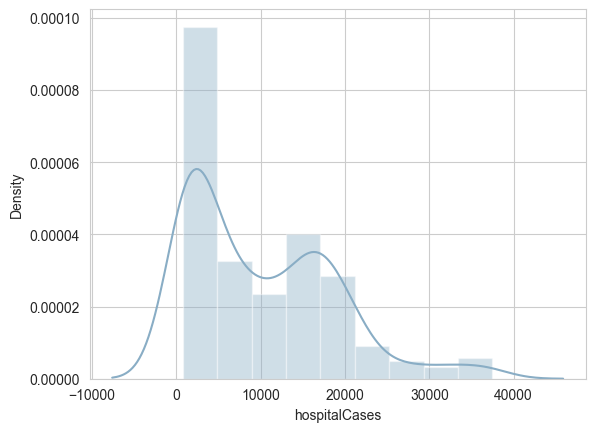

In [10]:
import datetime
hosp_df["date"] = pd.to_datetime(hosp_df["date"], yearfirst=True)
hosp_df['date'] = hosp_df['date'].dt.strftime('%b')
# hosp_df['date'] = datetime.datetime.strptime(hosp_df['date'], '%Y-%B')
# hosp_df['date']


sns.distplot(hosp_df['hospitalCases'])

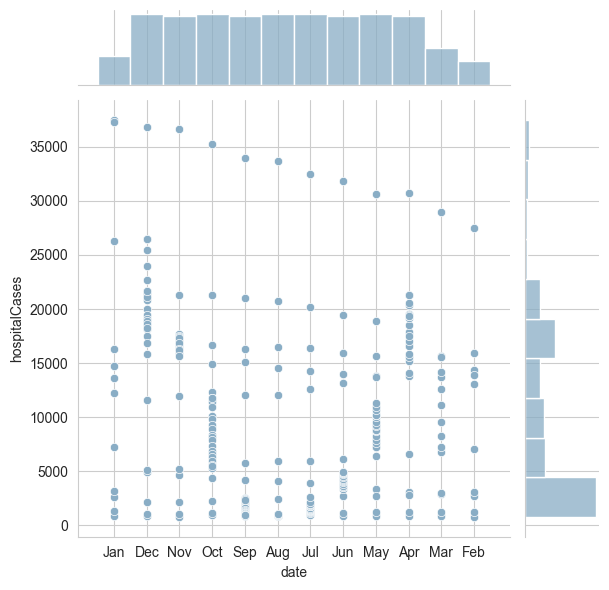

In [11]:
sns.jointplot(x='date',y='hospitalCases',data=hosp_df)

With the code above we try create a joint plot that shows the relationship between two variables, date and hospitalCases. The joint plot is a combination of a scatter plot and a histogram. The scatter plot shows the distribution of the two variables, while the histogram displays the frequency distribution of each variable. The plot allows us to visually determine if there is any correlation between the two variables, and whether there are any outliers or patterns in the data.

In our case, we can see a relationship at its highest at the beginning of COVID-19, following a curve reaching at its lowest as weeks passing by. The most interesting part is that before its end, there is a spike reaching high enough, which makes sense since there were alot of cases during that period

<Axes: ylabel='Density'>

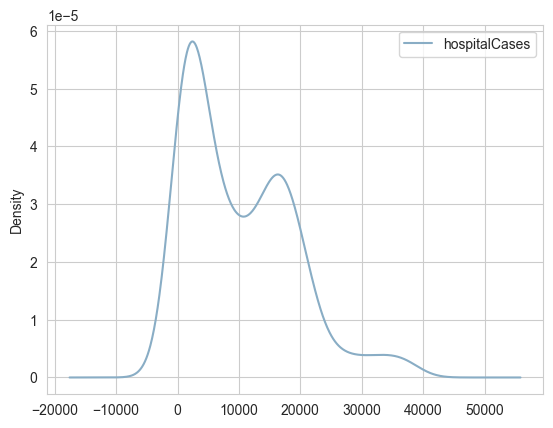

In [12]:
hosp_df.plot.kde()

Using the kde() function in the pandas library, we can generate Kernel Density Estimate plots. These plots display the probability density function of a random variable, which is estimated using a non-parametric kernel function. 

In the context of the hosp_df DataFrame, calling kde() on this DataFrame will generate a KDE plot showing the estimated probability density function of the `hospitalCases`. This can be useful for understanding the underlying distribution of the data and for identifying any potential outliers or unusual patterns.

Again, as before, we can see that between 0 and 10k cases there is a spike as well as between 10k and 20k. After that we see a decreased slope, which means declined cases.

---

Let's do another **EDA** for our second dataframe, `Vaccinations.csv`

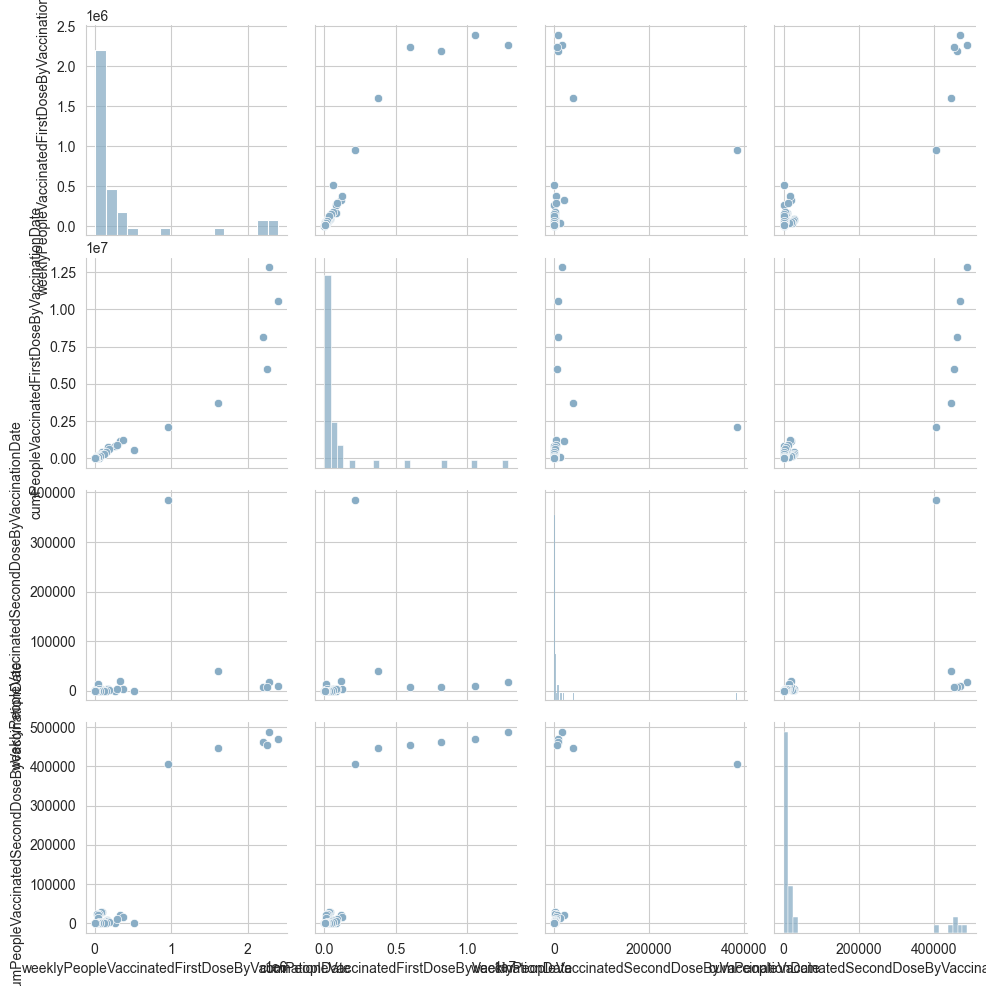

In [13]:
sns.pairplot(vacc_df)

What we can understand from the code above, is to visualize the relationships between pairs of variables in a Pandas DataFrame called `vacc_df`. 

This type of plot is a scatterplot matrix that displays scatterplots for each pair of variables and histograms for each individual variable along the diagonal.

<Axes: xlabel='areaName', ylabel='count'>

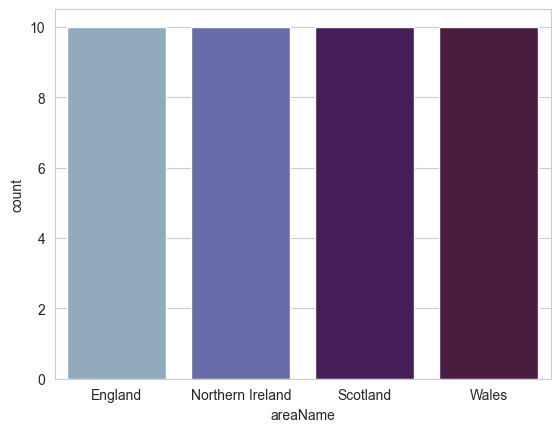

In [14]:
sns.countplot(x='areaName',data=vacc_df)

We are now using the countplot() function from the seaborn library to visualize the frequency distribution of a categorical variable called `areaName` in a Pandas DataFrame called `vacc_df`.

We are using this type of plot to display the count of occurrences of each category on the x-axis. In our case, we see that all four areas has the same distribution or the same count of occurrences in our dataFrame.

Now let's see the distribution of quantitative data, using boxplot() function, for the column `weeklyPeopleVaccinatedFirstDoseByVaccinationDate`

<Axes: xlabel='areaName', ylabel='weeklyPeopleVaccinatedFirstDoseByVaccinationDate'>

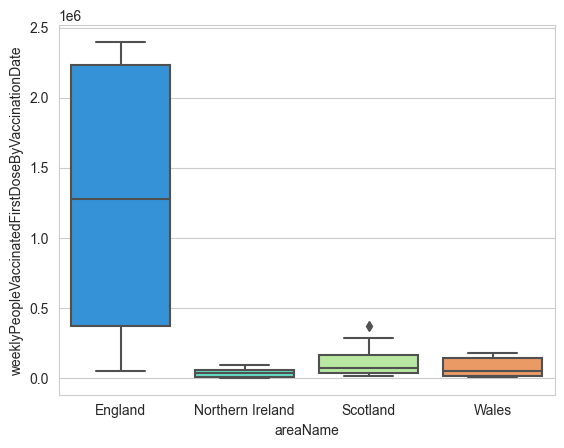

In [15]:
sns.boxplot(x="areaName", y="weeklyPeopleVaccinatedFirstDoseByVaccinationDate", data=vacc_df,palette='rainbow')

We can do the same for the column `weeklyPeopleVaccinatedSecondDoseByVaccinationDate`

<Axes: xlabel='areaName', ylabel='weeklyPeopleVaccinatedSecondDoseByVaccinationDate'>

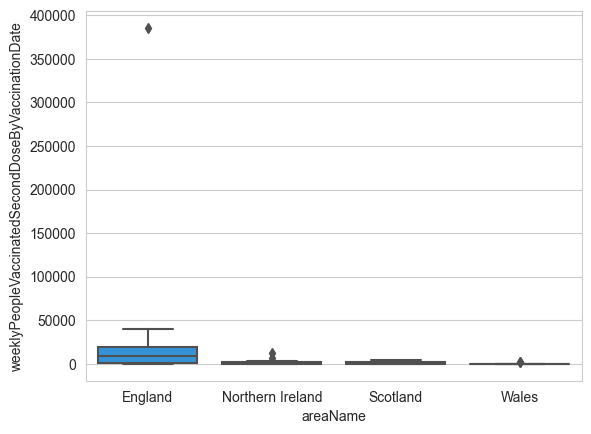

In [16]:
sns.boxplot(x="areaName", y="weeklyPeopleVaccinatedSecondDoseByVaccinationDate", data=vacc_df,palette='rainbow')

We are using the boxplot() function to visualize the distribution and variability of a numerical variable called `weeklyPeopleVaccinatedFirstDoseByVaccinationDate` in the first boxplot and `weeklyPeopleVaccinatedSecondDoseByVaccinationDate` in the second, across different categories of a categorical variable, which in our case is called `areaName` in a Pandas DataFrame called `vacc_df`. 

This type of plot is a box-and-whisker plot that displays the median, quartiles, and outliers of each category of the categorical variable on the x-axis. We can see from the second plot, that England has huge number of outliers.

Another interesting indicator from the second plot, is that the total number of vaccinations of second dose, was incredible low compared to the first dose.

Let's use another similar plot called violinplot()

<Axes: xlabel='areaName', ylabel='weeklyPeopleVaccinatedFirstDoseByVaccinationDate'>

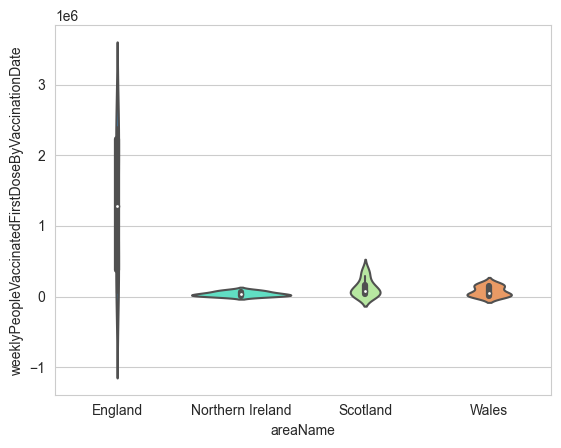

In [17]:
sns.violinplot(x="areaName", y="weeklyPeopleVaccinatedFirstDoseByVaccinationDate", data=vacc_df,palette='rainbow')

Although the violinplot() has almost the same usage like boxplot, it has a difference that unlike the boxplot(), in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution and it displays the density of each category of the categorical variable on the x-axis that is `areaName`

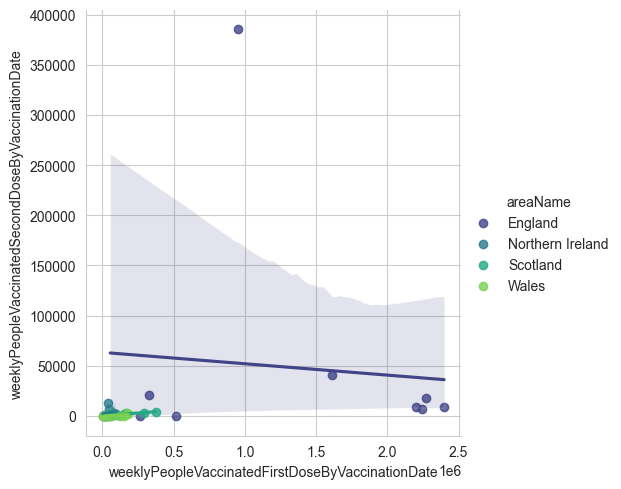

In [18]:
sns.lmplot(x='weeklyPeopleVaccinatedFirstDoseByVaccinationDate',y='weeklyPeopleVaccinatedSecondDoseByVaccinationDate',data=vacc_df,hue='areaName',palette='viridis')

We are using the lmplot() function to create a scatter plot with a linear regression line that shows the relationship between two numerical variables called `weeklyPeopleVaccinatedFirstDoseByVaccinationDate` and `weeklyPeopleVaccinatedSecondDoseByVaccinationDate` in a Pandas DataFrame called `vacc_df`. 

Additionally, this plot is differentiated by the `areaName` categorical variable using different colors for each category.

We can infer from the plot above that the second dose was very low and did not exceed 50k related to the first dose. We also can conclude that `England` area had the most vaccinations from both doses.

# Training and Testing Data

Let's split up the data into a training set and a test set!

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = vacc_df.drop(['areaName', 'date'],axis=1)
y = vacc_df['areaName']

With the above code, we are preparing data for machine learning algorithms. The X object represents the features or independent variables that will be used to make predictions, while the y object represents the target or dependent variable that is being predicted.

By separating the features and target variables, it becomes easier to manipulate the data, perform EDA, and train machine learning models. In our case, we want to predict the `areaName` column, hence the call to drop() method from our features (X) and we use for our target variable (y) the `areaName` as well.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The train_test_split() function takes in two required arguments: X and y, which represent the features and target variables respectively. 

The test_size parameter is set to 0.30, which means that 30% of the data will be allocated to the test set and 70% will be allocated to the training set.

The train_test_split() function randomly divides the data into training and testing sets, which helps to ensure that the model is not biased towards specific parts of the data. By splitting the data into training and testing sets, we can evaluate the model's performance on new, unseen data and prevent **overfitting**.

The X_train and y_train objects represent the features and target variables, respectively, that will be used to train the machine learning model. The X_test and y_test objects represent the features and target variables, respectively, that will be used to evaluate the performance of the trained model on new, unseen data.

Overall, this code is an essential step in preparing the data for machine learning algorithms and is typically used in most supervised learning tasks, such as classification and regression.

## Decision Trees

We'll start just by training a single decision tree.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

The code above, creates a decision tree model using a machine learning algorithm called the DecisionTreeClassifier. The model is trained using some training data, which is a set of features and a corresponding target variable. 

The algorithm builds a tree-like model of decisions based on the input data, where each node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label. The trained model can be used to predict the target variable for new, unseen data.

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

                  precision    recall  f1-score   support

         England       1.00      0.67      0.80         3
Northern Ireland       0.75      0.60      0.67         5
        Scotland       1.00      0.50      0.67         4
           Wales       0.00      0.00      0.00         0

        accuracy                           0.58        12
       macro avg       0.69      0.44      0.53        12
    weighted avg       0.90      0.58      0.70        12



/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [28]:
print(confusion_matrix(y_test,predictions))

[[2 1 0 0]
 [0 3 0 2]
 [0 0 2 2]
 [0 0 0 0]]


This code evaluates how well a decision tree model can predict target values on test data. The "predict" method is used to generate predicted values for the test data. 

Then, the "classification_report" function is called to print a report of classification metrics for the predicted values compared to the true values in the test data. The metrics include precision, recall, f1-score, and support for each class in the target variable. 

This code is important because it helps to evaluate how accurate the decision tree model is at making predictions on new data. The confusion_matrix function can also be used to gain further insights into the model's performance.

## Random Forests

Now let's compare the decision tree model to a random forest.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

This code uses a machine learning algorithm called Random Forest to create a model that can predict the target variable based on the input features. The Random Forest algorithm creates multiple decision trees and combines them to make more accurate predictions. 

In this code, the RandomForestClassifier class from the sklearn.ensemble module is used to create a Random Forest model with 100 decision trees. The fit method is then used to train the model on the training data. By using Random Forest, the model can reduce overfitting and improve accuracy on new data.

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[1 0 0 2]
 [0 3 0 2]
 [0 0 2 2]
 [0 0 0 0]]


In [32]:
print(classification_report(y_test,rfc_pred))

                  precision    recall  f1-score   support

         England       1.00      0.33      0.50         3
Northern Ireland       1.00      0.60      0.75         5
        Scotland       1.00      0.50      0.67         4
           Wales       0.00      0.00      0.00         0

        accuracy                           0.50        12
       macro avg       0.75      0.36      0.48        12
    weighted avg       1.00      0.50      0.66        12



/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stkvrs/.pyenv/versions/3.10.10/envs/.venv_math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

By comparing the two classification algorithms, we can deduce that the Random Forest algorithm performs a little better than the Decision Tree. Decision Tree algorithm is prone to **overfitting** as we discussed above.

## K Nearest Neighbours

To prepare the dataset for machine learning, we need to standardize it. This is important because many machine learning algorithms work best with features that are roughly normally distributed with a mean of 0 and a standard deviation of 1. If the data is not standardized, some algorithms may not work well and produce poor results.

## Standardize the Variables

The KNN classifier relies on identifying the nearest observations to a test observation to predict its class. Therefore, the magnitude of the variables has an impact on the KNN classifier. Variables with larger scales have a greater influence on the distance between observations and, consequently, on the KNN classifier, compared to variables with smaller scales.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(vacc_df.drop(['areaName','date'],axis=1))

StandardScaler()

In [36]:
scaled_features = scaler.transform(vacc_df.drop(['areaName','date'],axis=1))

In this code, we're using a scaler object to transform numerical data in the 'vacc_df' dataframe. This process scales and normalizes each feature in the data so that they are all on the same scale. In other words, the transform method scales and normalizes the data so that each feature has a mean of 0 and a standard deviation of 1

This is important because features on different scales can have different impacts on the analysis. By scaling and normalizing the data, we can make sure that each feature is treated equally. After dropping some columns, the transform method is applied to the remaining numerical features, and the resulting data is stored in a new variable called 'scaled_features'.

In [37]:
df_feat = pd.DataFrame(scaled_features, columns=vacc_df.columns[2:])
df_feat.head()

,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,2.717498,3.988408,0.067825,2.581358
1,2.901789,3.200984,-0.081209,2.472128
2,2.613851,2.369149,-0.082957,2.418694
3,2.681174,1.606702,-0.115245,2.365916
4,1.764818,0.828031,0.450183,2.325225


### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,vacc_df['areaName'],test_size=0.30,random_state=42)

## Using KNN

Remember that we are trying to come up with a model to predict the `areaName`. We'll start with k=1.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
pred = knn.predict(X_test)

As we have already seen up to this moment, the code above, creates a K-nearest neighbors classifier using scikit-learn library with k=1. 

The classifier is trained on the X_train and y_train data using the fit method. The classifier predicts the target variable of the X_test data using the predict method, and stores the predicted values in the pred variable. This allows us to evaluate the performance of the K-nearest neighbors classifier on new, unseen data.

### Predictions and Evaluations

Let's evaluate our KNN model!

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[1 0 2 0]
 [0 3 0 1]
 [0 0 0 3]
 [0 2 0 0]]


In [46]:
print(classification_report(y_test,pred))

                  precision    recall  f1-score   support

         England       1.00      0.33      0.50         3
Northern Ireland       0.60      0.75      0.67         4
        Scotland       0.00      0.00      0.00         3
           Wales       0.00      0.00      0.00         2

        accuracy                           0.33        12
       macro avg       0.40      0.27      0.29        12
    weighted avg       0.45      0.33      0.35        12



The model we used to predict results had decent accuracy, but there is a chance for us to get even better results by changing the K value in the K-nearest neighbors algorithm. 

The K value indicates how many nearest neighbors to look at when predicting for a new data point. To find the best K value, we can use the elbow method which involves plotting the model's accuracy as a function of different K values. We should look for the point in the graph where the increase in accuracy starts to level off and forms an elbow shape.

This is the optimal K value for the model. By trying different K values and using the elbow method, we can improve the accuracy of our K-nearest neighbors algorithm and make more accurate predictions for new data.

### Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [47]:
error_rate = []

# Will take some time
for i in range(1,29):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

This code above, is trying to find the best value of K to use in the K-nearest neighbors algorithm for making predictions aka The `elbow` method. 

The algorithm works by considering the K nearest neighbors to a new data point and assigning it the most common class among those K neighbors. The for loop in the code runs the algorithm for values of K from 1 to 28 and calculates the error rate for each value of K. 

The error rate is the proportion of incorrect predictions made by the algorithm on the test data. The error rates for each value of K are stored in a list called 'error_rate'. Later on, this list can be used to identify the value of K that gives the lowest error rate, which will be the best value of K to use for the algorithm.

Text(0, 0.5, 'Error Rate')

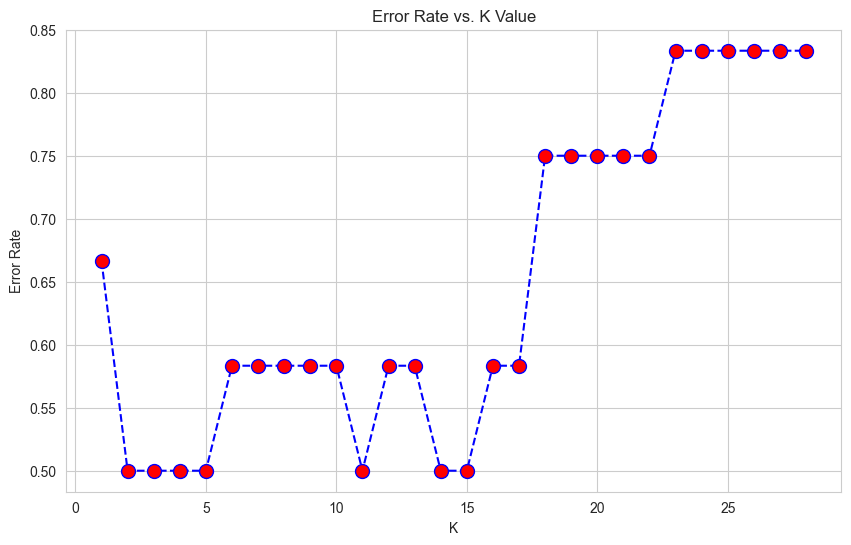

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,29),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that the first `elbow` is after K>2-5 the error rate just drops from 0.66 to 0.5. Let's retrain the model with that and check the classification report!

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1 0 2 0]
 [0 3 0 1]
 [0 0 0 3]
 [0 2 0 0]]


                  precision    recall  f1-score   support

         England       1.00      0.33      0.50         3
Northern Ireland       0.60      0.75      0.67         4
        Scotland       0.00      0.00      0.00         3
           Wales       0.00      0.00      0.00         2

        accuracy                           0.33        12
       macro avg       0.40      0.27      0.29        12
    weighted avg       0.45      0.33      0.35        12



In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[1 0 1 1]
 [0 4 0 0]
 [0 0 1 2]
 [0 2 0 0]]


                  precision    recall  f1-score   support

         England       1.00      0.33      0.50         3
Northern Ireland       0.67      1.00      0.80         4
        Scotland       0.50      0.33      0.40         3
           Wales       0.00      0.00      0.00         2

        accuracy                           0.50        12
       macro avg       0.54      0.42      0.43        12
    weighted avg       0.60      0.50      0.49        12



The classification report shows that increasing the value of K improves the performance of the model as compared to using K=1. 

Although the increase in performance is not very significant, it is still an improvement over the previous results. In other words, when using a higher K value, the model is better at predicting the correct class for a new observation as compared to using K=1.

However, it is worth noting that there may still be room for further improvement and optimization, as the model's performance may not yet be at its highest potential. Nonetheless, this finding is important because it suggests that tweaking the K value can lead to better predictions for new data.

# Conclusion

On the basis of the study's findings, it was determined that the K-nearest neighbors (KNN) algorithm performed better than the Random Forest and Decision Tree algorithms. In this study, the superior performance of KNN can be attributed to its non-parametric character, which enables it to function without assuming any underlying data distribution. This characteristic makes KNN more resistant to the presence of data anomalies and outliers. In addition, the simplicity and convenience of implementation of KNN may have contributed to its success in this study. In addition, KNN is ideally suited for datasets with a large number of features, which improves its ability to capture complex relationships between predictor variables and the target variable. The findings indicate that the KNN algorithm is a legitimate option for predictive tasks involving similar datasets. However, additional research is required to identify the optimal algorithm for particular datasets and problems.